**Trabajo Práctico II**

---
Tecnicatura Universitaria en Inteligencia Artificial

Materia: Minería de Datos

Fecha de entrega: 29-05

Estudiantes:

*   Domingo, Francisco
*   Valeri, Lara Rita

Año de cursada: 1° cuatrimestre 2024

Docentes:
* Flavio E. Spetale
* Facundo Vasquez

# Importamos las librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix


Decidimos dividir el trabajo práctico en 2 partes, en función de que data set se utiliza:

- Parte I: Apartados 1 y 2, referidos al data set '1000_Companies.csv'
- Parte II: Apartados 3 a 6, referidos al data set 'PokemonDB.csv'

# Parte I

In [357]:
# Generación de dataframe a partir del CSV
df = pd.read_csv('1000_Companies.csv')

# Visualización de las primeras 5 filas para conocer la estructura de los datos
print(df.head())

   RyD_Spend  Administration  MarketingSpend       State     Profit
0  165349.20       136897.80       471784.10    New York  192261.83
1  162597.70       151377.59       443898.53  California  191792.06
2  153441.51       101145.55       407934.54     Florida  191050.39
3  144372.41       118671.85       383199.62    New York  182901.99
4  142107.34        91391.77       366168.42     Florida  166187.94


El dataset que utilizaremos en esta parte del trabajo esta relacionado con el comportamiento financiero de 1000 empresas.

In [358]:
print(df.shape)

(1000, 5)


### Analisis de los atributos del conjunto de datos 

In [359]:
# Obtenemos información general sobre el DataFrame, incluyendo tipos de datos y conteo de valores no nulos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None


Podemos observar que no tenemos datos nulos y que los datos pueden ser flotantes y objetos. Analizamos un poco más el tipo de datos, unidad de medida y que representan en el contexto del dataset.

In [360]:
# A continuación obtenemos una tabla que describe nuestros datos: media, desvío, cuartiles, valores máximos y minimos para cada columna.
df.describe()
#Eso se realiza solo para las variables numéricas, es decir no se eincluye state

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


- RyD_Spend: Gastos en investigación y Desarrollo
- Administration: gastos en Administración
- MarketingSpend: gastos en Marketing
- Profit: ganancia de la compañía.

Suponemos que estas variables se encuentran en dólares ya que los estados corresponden a Estados Unidos.
- State: estado donde se encuentra la compañía que, como se puede ver a conitnuación, los estados pueden ser: New York, California o Florida 

In [361]:
states= df['State'].unique()
states

array(['New York', 'California', 'Florida'], dtype=object)

In [362]:
# Vamos a codificar esta columna
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
# Veamos el resultado
states_enc = df['State'].unique()
print("Códigos para identificar a los estados: ")
print('Estado', 'Código')
for cu, co in zip(states, states_enc):
    print('{:<10} {:<5}'.format(cu, co))

Códigos para identificar a los estados: 
Estado Código
New York   2    
California 0    
Florida    1    


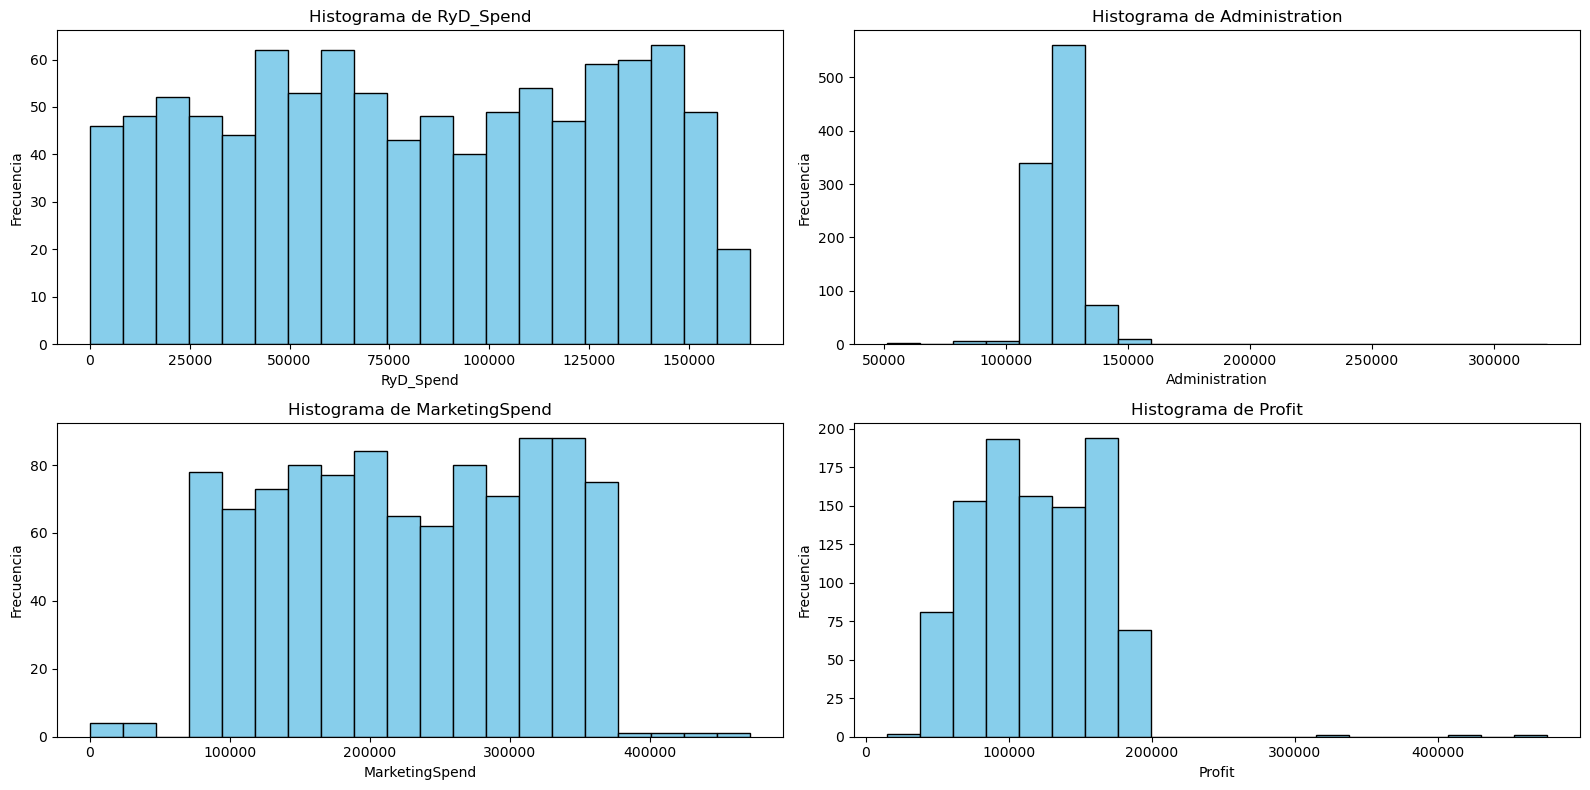

In [363]:
# Realizamos un histograma de las variables numéricas
variables_numericas = ['RyD_Spend', 'Administration','MarketingSpend', 'Profit']
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for i, variable in enumerate(variables_numericas):
    fila = i // 2
    columna = i % 2
    axs[fila, columna].hist(df[variable], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Frecuencia')
    axs[fila, columna].set_title('Histograma de ' + variable) 


plt.tight_layout()

plt.show()

#HACER: interpretar estos gráficos ver si los dejamos o no.

- Histograma de RyD_Spend (Investigación y Desarrollo):
La distribución es bastante uniforme, aunque hay algunas variaciones. Parece haber un número significativo de empresas que gastan entre 25,000 y 150,000 en I+D, con una caída notable en el rango de 150,000 a 175,000.

- Histograma de Administration (Administración):
Podemos observar que la mayoría de las empresas tienen gastos de administración entre 100,000 y 150,000. Hay muy pocas empresas que gastan más de 200,000 en administración.

- Histograma de MarketingSpend (Gasto en Marketing):
En este caso podemos observar que la distribución es bastante uniforme hasta alrededor de 300,000, después de lo cual hay una disminución abrupta. Esto sugiere que muchas empresas invierten una cantidad considerable en marketing, pero pocas superan los 300,000.

- Histograma de Profit (Beneficio):
La mayoría de las empresas tienen beneficios entre 50,000 y 200,000, con una notable concentración en el rango de 100,000 a 150,000. Muy pocas empresas tienen beneficios superiores a 300,000.

### Eliminación de outliers

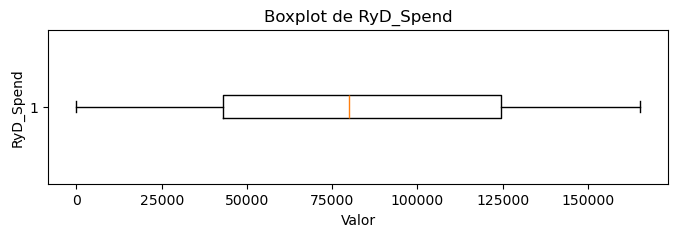

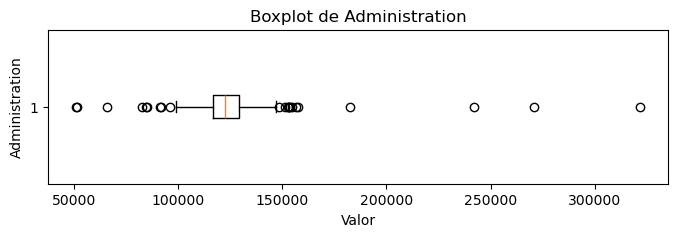

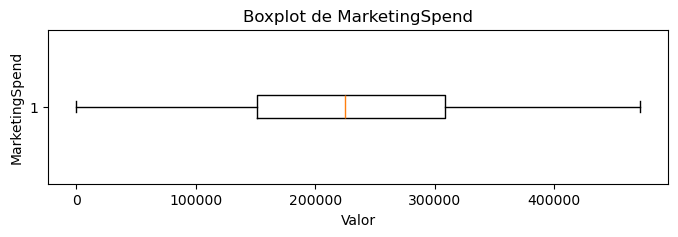

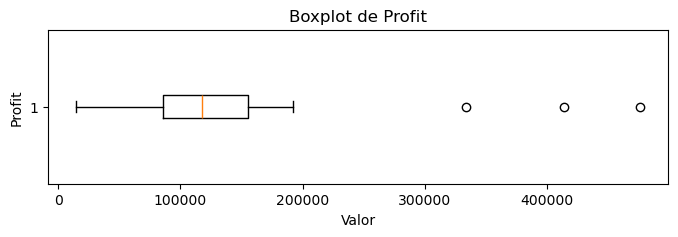

In [364]:
for variable in variables_numericas:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[variable], vert=False)
    plt.xlabel('Valor')
    plt.ylabel(variable)
    plt.title('Boxplot de ' + variable)
    plt.show()


A partir de los gráficos anteriores podemos observar tanto RyD_Spend como MarketingSpend, no tiene valores atípicos. Mientras que Profit y Administration si tienen. 

Ademas podemos obsevar que Profit tiene solo 3 valores atípicos, administration no llegamos a ver cuantos valores atípicos tiene en total pero se observan varios puntos que están fuera de el rango intercuartilico.

Analizamos porcentaje de valores atípicos en cada caso

In [365]:
def count_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    count = outliers.count()
    percentage = 100 * count / group.count()
    return count, percentage

In [366]:
# Calculamos la cantidad y porcentaje de valores atípicos para 'Administration' y 'Profit'
admin_outliers_count, admin_outliers_percentage = count_outliers(df['Administration'])
profit_outliers_count, profit_outliers_percentage = count_outliers(df['Profit'])

print(f"Cantidad de valores atípicos en 'Administration': {admin_outliers_count}")
print(f"Porcentaje de valores atípicos en 'Administration': {admin_outliers_percentage:.2f}%")
print(f"Cantidad de valores atípicos en 'Profit': {profit_outliers_count}")
print(f"Porcentaje de valores atípicos en 'Profit': {profit_outliers_percentage:.2f}%")

Cantidad de valores atípicos en 'Administration': 22
Porcentaje de valores atípicos en 'Administration': 2.20%
Cantidad de valores atípicos en 'Profit': 3
Porcentaje de valores atípicos en 'Profit': 0.30%


Podemos observar que en el caso de Profit tiene un porcentaje muy bajo de valores atípicos. En el caso de Administration los analziaremos un poco más.

Para ellos realizaremos un boxplot por estado.

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


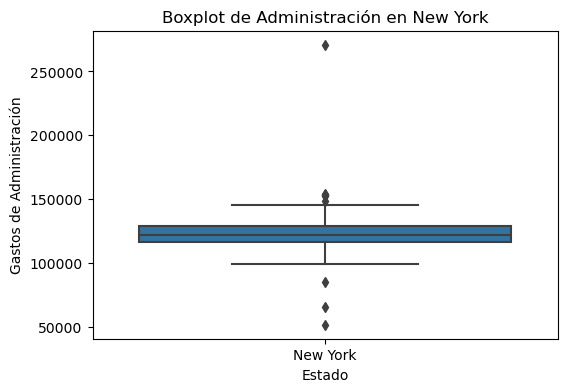

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


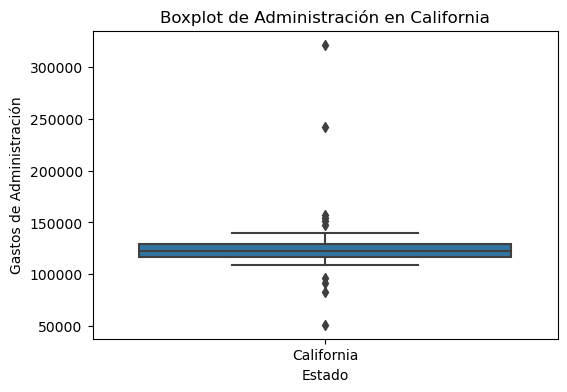

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


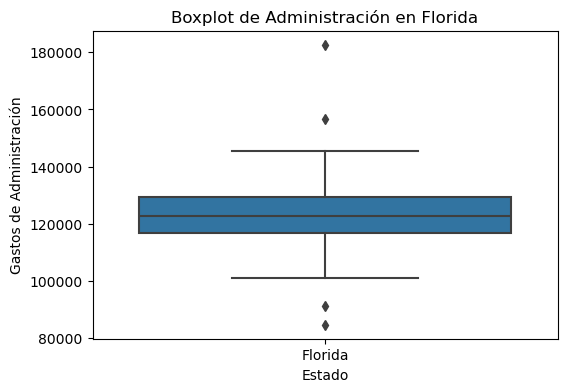

In [367]:
state_mapping = {0: 'California', 1: 'Florida', 2: 'New York'}
df['State'] = df['State'].map(state_mapping)
states = df['State'].unique()

for state in states:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='State', y='Administration', data=df[df['State'] == state])
    plt.title(f'Boxplot de Administración en {state}')
    plt.xlabel('Estado')
    plt.ylabel('Gastos de Administración')
    plt.show()

In [368]:
# Calculamo la cantidad de valores atípicos y el porcentaje por estado
outliers_info = df.groupby('State')['Administration'].apply(count_outliers).reset_index()
outliers_info[['Outliers_Count', 'Outliers_Percentage']] = pd.DataFrame(outliers_info['Administration'].tolist(), index=outliers_info.index)
outliers_info = outliers_info.drop(columns='Administration')

print(outliers_info)

        State  Outliers_Count  Outliers_Percentage
0  California              10             2.906977
1     Florida               4             1.242236
2    New York               9             2.694611


Como la cantidad de outliers es poca decidimos dejarlos y entrenar dos veces nuestro modelo, una con estos valores y otra eliminadolos, ya que consideramos que quizas la presencia de estos datos no afecte el resultado.

A partir de esto analizaremos como son las métricas en cada caso.

## Estandarización

In [369]:
states_enc = df['State'].unique()
states_enc

array(['New York', 'California', 'Florida'], dtype=object)

In [370]:
df['State'] = le.fit_transform(df['State'])
# Veamos el resultado
states_enc = df['State'].unique()
states_enc

array([2, 0, 1])

Para la estandarización no incluimos la columna State, ya que no es una variable continua

In [371]:
df.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [372]:
numeric_columns = ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']

In [373]:
# Aplicamos Min-Max scaling para llevar las características a un rango común
min_max_scaler = MinMaxScaler()
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

print(df.head().round(4))

   RyD_Spend  Administration  MarketingSpend  State  Profit
0     1.0000          0.3167          1.0000      2  0.3845
1     0.9834          0.3702          0.9409      0  0.3835
2     0.9280          0.1844          0.8647      1  0.3819
3     0.8731          0.2492          0.8122      2  0.3643
4     0.8594          0.1483          0.7761      1  0.3281


In [374]:
# # También hacemos Z-score
# standard_scaler = StandardScaler()
# df[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

# print(df.head().round(4))

En este caso elegimos Min-Max scaling

## Estimación de Profit con árboles de decisión - Optimización de hiperparámetros (caso 1)

En este caso utilizaremos los valores atípicos, es decir, sin modificarlos ni eliminarlos del df.

### Estimación del atributo Profit utilizando árboles de decisión

Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión)
analizando los parámetros máximo profundidad, número mínimo de observaciones,
número mínimo de observaciones por separación y criterio de separación. 

Graficar el
árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos
conjuntos de test (Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error
Cuadrático Medio)

In [375]:
X = df.drop(columns=['Profit'])
y = df['Profit']

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [377]:
# Generamos variables dummies
feature_list = list(X_train.columns)

In [378]:
# Aplicamos la técnica
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=13 )

In [379]:
regressor_tree = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [380]:
from sklearn.tree import export_text
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 0.50
|   |--- RyD_Spend <= 0.24
|   |   |--- RyD_Spend <= 0.12
|   |   |   |--- RyD_Spend <= 0.00
|   |   |   |   |--- MarketingSpend <= 0.05
|   |   |   |   |   |--- Administration <= 0.16
|   |   |   |   |   |   |--- value: [0.05]
|   |   |   |   |   |--- Administration >  0.16
|   |   |   |   |   |   |--- value: [0.06]
|   |   |   |   |--- MarketingSpend >  0.05
|   |   |   |   |   |--- value: [0.00]
|   |   |   |--- RyD_Spend >  0.00
|   |   |   |   |--- RyD_Spend <= 0.06
|   |   |   |   |   |--- Administration <= 0.22
|   |   |   |   |   |   |--- value: [0.08]
|   |   |   |   |   |--- Administration >  0.22
|   |   |   |   |   |   |--- value: [0.09]
|   |   |   |   |--- RyD_Spend >  0.06
|   |   |   |   |   |--- Administration <= 0.23
|   |   |   |   |   |   |--- value: [0.10]
|   |   |   |   |   |--- Administration >  0.23
|   |   |   |   |   |   |--- value: [0.11]
|   |   |--- RyD_Spend >  0.12
|   |   |   |--- MarketingSpend <= 0.27
|   |   |   |   |--- Admini

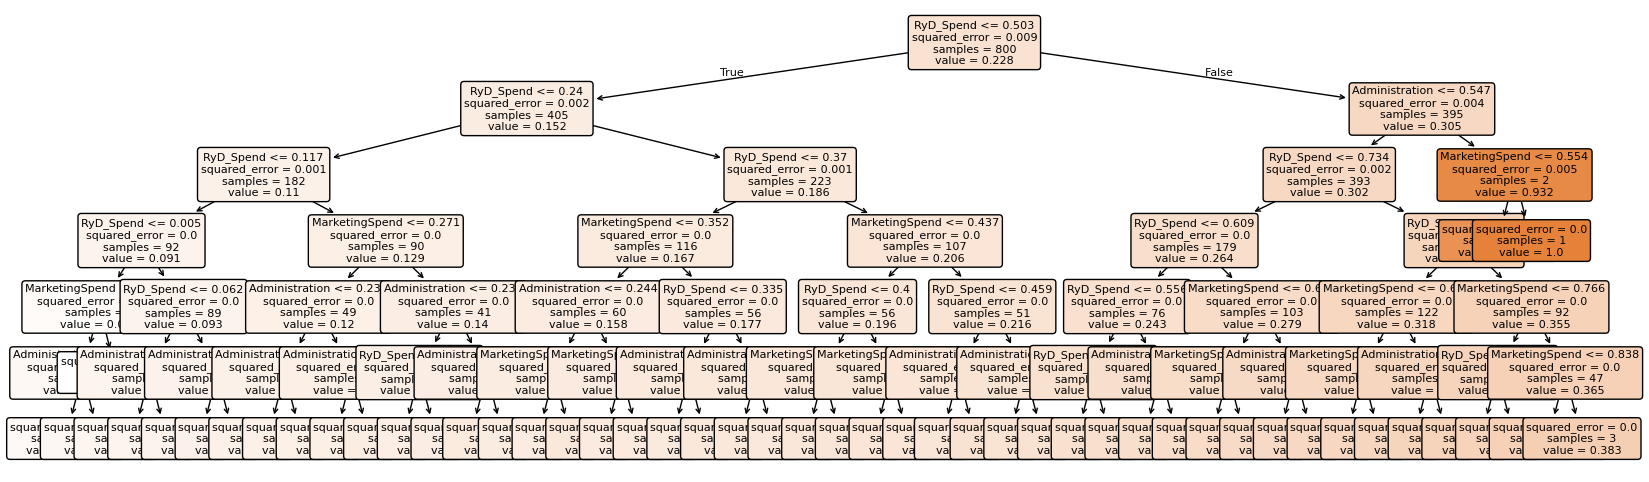

In [381]:
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

### Optimización de hiperparámetros

GridSearchCV es una técnica de búsqueda de hiperparámetros que te permite explorar de manera sistemática diferentes combinaciones de hiperparámetros para un modelo de machine learning, utilizando validación cruzada para evaluar la calidad de cada combinación.

Para cada combinación de hiperparámetros, GridSearchCV realiza entrenamiento y validación cruzada del modelo. Divide los datos en k conjuntos (k-folds) y utiliza k-1 conjuntos para entrenar el modelo y el conjunto restante para evaluar el rendimiento. Esto se repite k veces, de forma que cada conjunto se utiliza para la evaluación exactamente una vez.

In [382]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

warnings.filterwarnings("ignore")

# Calcular las métricas de evaluación
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Error absoluto medio (MAE) en el conjunto de test:", mae_test.round(6))
print("Error cuadrático medio (MSE) en el conjunto de test:", mse_test.round(6))
print("Raíz del error cuadrático medio (RMSE) en el conjunto de test:", rmse_test.round(6))

warnings.filterwarnings("default")



Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Error absoluto medio (MAE) en el conjunto de test: 0.001876
Error cuadrático medio (MSE) en el conjunto de test: 0.000295
Raíz del error cuadrático medio (RMSE) en el conjunto de test: 0.017173


In [383]:
tableResult = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
tableResult.head()

,Actual,Predicted
521,0.237304,0.237969
737,0.209128,0.208535
740,0.166065,0.165715
660,0.242885,0.243637
411,0.316859,0.316934


#### 30% test - 70% train 

In [384]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [385]:
# Generamos variables dummies
feature_list = list(X_train_2.columns)
# Aplicamos la técnica
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=13 )
regressor_tree = clf.fit(X_train_2, y_train_2)
predictions = clf.predict(X_test_2)

In [386]:
best_params

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [387]:
# Optimización de hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_2, y_train_2)
best_params_2 = grid_search.best_params_
print("Mejores hiperparámetros:", best_params_2)
best_model = grid_search.best_estimator_
y_pred_test_2 = best_model.predict(X_test_2)

warnings.filterwarnings("ignore")

# Calcular las métricas de evaluación
mae_test_2 = mean_absolute_error(y_test_2, y_pred_test_2)
mse_test_2 = mean_squared_error(y_test_2, y_pred_test_2)
rmse_test_2 = mean_squared_error(y_test_2, y_pred_test_2, squared=False)

print("Error absoluto medio (MAE) en el conjunto de test:", mae_test_2.round(6))
print("Error cuadrático medio (MSE) en el conjunto de test:", mse_test_2.round(6))
print("Raíz del error cuadrático medio (RMSE) en el conjunto de test:", rmse_test_2.round(6))

warnings.filterwarnings("default")

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Error absoluto medio (MAE) en el conjunto de test: 0.001831
Error cuadrático medio (MSE) en el conjunto de test: 0.000209
Raíz del error cuadrático medio (RMSE) en el conjunto de test: 0.014448


In [388]:
# Armamos una tabla 
dic = {
    "Métrica": ["MAE (Mean Absolute Error)", "MSE (Mean Squared Error)", "RMSE (Root Mean Squared Error)"],
    "20-80": [mae_test, mse_test, rmse_test],
    "30-70": [mae_test_2, mse_test_2, rmse_test_2]
}

metricas = pd.DataFrame(dic)
print(metricas)

                          Métrica     20-80     30-70
0       MAE (Mean Absolute Error)  0.001876  0.001831
1        MSE (Mean Squared Error)  0.000295  0.000209
2  RMSE (Root Mean Squared Error)  0.017173  0.014448


In [389]:
df_params = pd.DataFrame({
    "Hiperparámetro": ["max_depth", "min_samples_leaf", "min_samples_split"],
    "20-80": [best_params['max_depth'], best_params['min_samples_leaf'], best_params['min_samples_split']],
    "30-70": [best_params_2['max_depth'], best_params_2['min_samples_leaf'], best_params_2['min_samples_split']]
})
print("\nMejores Hiperparámetros")
print(df_params)


Mejores Hiperparámetros
      Hiperparámetro  20-80  30-70
0          max_depth    NaN     10
1   min_samples_leaf    1.0      1
2  min_samples_split    5.0      5


**Conclusiones:**

A partir de los resultados obtenidos en función de las métricas podemos concluir que la división 30-70 es mejor en este caso, ya que proporciona un mejor rendimiento del modelo según las métricas evaluadas. Esto podría deberse a que con un 30% de datos de prueba, el modelo tiene más datos de entrenamiento para aprender patrones significativos, mientras que el tamaño del conjunto de prueba sigue siendo suficientemente grande para evaluar adecuadamente el rendimiento del modelo.

En lo que respecta a los hiperparamétros el hecho de que max_depth sea NaN indica que el modelo de árbol de decisiones tiene la libertad de crecer sin restricciones en la profundidad, lo que puede llevar a un modelo más complejo y con mayor riesgo de sobreajuste.

Como los otros valores obtenidos coinciden en ambos casos, preferimos el modelo 30-70 ya que la máxima profundidad es 10. Limitar la profunidad puede ayudar a prevenir el sobreajuste al proporcionar una estructura más simple y fácil de interpretar. Además puede mejorar la velocidad de entrenamiento y hacer que el modelo sea más eficiente en términos de recursos.

## Estimación de Profit con árboles de decisión - Optimización de hiperparámetros (caso 2)

En este caso eliminamos los valores atipicos del data set, como los procentajes de valores atipicos en cada caso son muy chicos decidimos eliminarlos.

In [390]:
df_2 = pd.read_csv('1000_Companies.csv')

# Visualización de las primeras 5 filas para conocer la estructura de los datos
print(df_2.head())

   RyD_Spend  Administration  MarketingSpend       State     Profit
0  165349.20       136897.80       471784.10    New York  192261.83
1  162597.70       151377.59       443898.53  California  191792.06
2  153441.51       101145.55       407934.54     Florida  191050.39
3  144372.41       118671.85       383199.62    New York  182901.99
4  142107.34        91391.77       366168.42     Florida  166187.94


In [391]:
df.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [392]:
le = LabelEncoder()
df_2['State'] = le.fit_transform(df['State'])
states_enc = df_2['State'].unique()

In [393]:
# Eliminamos valores atípicos
# Suponiendo que df es tu DataFrame

Q1 = df_2[['Profit', 'Administration']].quantile(0.25)
Q3 = df_2[['Profit', 'Administration']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_2 = df_2[(df_2['Profit'] >= lower_bound['Profit']) & (df_2['Profit'] <= upper_bound['Profit']) &
                (df_2['Administration'] >= lower_bound['Administration']) & (df_2['Administration'] <= upper_bound['Administration'])]


In [394]:

delete =  df.shape[0] - df_2.shape[0]
porcentaje_delete = ((delete/df.shape[0])*100)
print("Cantidad de registros eliminados:", delete)
print("Porcentaje de registros eliminados:", porcentaje_delete,'%')

Cantidad de registros eliminados: 22
Porcentaje de registros eliminados: 2.1999999999999997 %


In [395]:
df_2

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.8000,471784.1000,2,192261.83000
2,153441.51,101145.5500,407934.5400,1,191050.39000
3,144372.41,118671.8500,383199.6200,2,182901.99000
5,131876.90,99814.7100,362861.3600,2,156991.12000
6,134615.46,147198.8700,127716.8200,0,156122.51000
...,...,...,...,...,...
992,105127.00,125982.7298,271621.8728,1,138841.98810
993,46798.00,117368.4374,159075.9080,0,89012.02672
994,97209.00,124813.3635,256344.0701,2,132077.70900
995,54135.00,118451.9990,173232.6695,0,95279.96251


In [396]:
# Aplicamos Min-Max scaling para llevar las características a un rango común
min_max_scaler = MinMaxScaler()
df_2[numeric_columns] = min_max_scaler.fit_transform(df_2[numeric_columns])

print(df_2.head().round(4))

   RyD_Spend  Administration  MarketingSpend  State  Profit
0     1.0000          0.7850          1.0000      2  1.0000
2     0.9280          0.0389          0.8647      1  0.9932
3     0.8731          0.4047          0.8122      2  0.9473
5     0.7976          0.0111          0.7691      2  0.8014
6     0.8141          1.0000          0.2707      0  0.7965


In [397]:
X_2 = df_2.drop(columns=['Profit'])
y_2 = df_2['Profit']

In [398]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [399]:
# Generamos variables dummies
feature_list_2 = list(X_train_2.columns)

In [400]:
# Aplicamos la técnica
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=13 )
regressor_tree = clf.fit(X_train_2, y_train_2)
predictions = clf.predict(X_test_2)

In [401]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_2, y_train_2)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred_test_2 = best_model.predict(X_test_2)

warnings.filterwarnings("ignore")

# Calcular las métricas de evaluación
mae_test_2 = mean_absolute_error(y_test_2, y_pred_test_2)
mse_test_2 = mean_squared_error(y_test_2, y_pred_test_2)
rmse_test_2 = mean_squared_error(y_test_2, y_pred_test_2, squared=False)

print("Error absoluto medio (MAE) en el conjunto de test:", mae_test.round(6))
print("Error cuadrático medio (MSE) en el conjunto de test:", mse_test.round(6))
print("Raíz del error cuadrático medio (RMSE) en el conjunto de test:", rmse_test.round(6))

warnings.filterwarnings("default")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error absoluto medio (MAE) en el conjunto de test: 0.001876
Error cuadrático medio (MSE) en el conjunto de test: 0.000295
Raíz del error cuadrático medio (RMSE) en el conjunto de test: 0.017173


## Comparaciones y conclusiones

In [402]:
# Resultados obtenidos eliminando los valores atípicos
resultados_sin_atipicos = {
    'Métrica': ['MAE', 'MSE', 'RMSE'],
    'Valores': [mae_test_2, mse_test_2, rmse_test_2]
}

# Resultados obtenidos sin eliminar valores atípicos
resultados_con_atipicos = {
    'Métrica': ['MAE', 'MSE', 'RMSE'],
    'Valores': [mae_test, mse_test, rmse_test]
}

df_sin_atipicos = pd.DataFrame(resultados_sin_atipicos)
df_con_atipicos = pd.DataFrame(resultados_con_atipicos)

resultados_combinados = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'RMSE'],
    'Sin Atípicos': [mae_test_2, mse_test_2, rmse_test_2],
    'Con Atípicos': [mae_test, mse_test, rmse_test]
})

print(resultados_combinados.round(6))


  Métrica  Sin Atípicos  Con Atípicos
0     MAE      0.002645      0.001876
1     MSE      0.000490      0.000295
2    RMSE      0.022138      0.017173


Podemos ver que todas las métricas empeoran cuando sacamos los valores 'atípicos'. 

Esto nos dice que el modelo parece funcionar mejor sin la eliminación de tales registros, entonces podemos concluir que los datos en realidad no son valores atípicos y que tienen sentido en terminos del problema.

Como el modelo es mejor considerando estos registros, para este caso no realizamos la optimización de hiperparámetros.

# Parte II

In [3]:
# Generación de dataframe a partir del CSV
data = pd.read_csv('PokemonDB.csv')

# Visualización de las primeras 5 filas para conocer la estructura de los datos
print(data.head())

         Name   Type  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0   Bulbasaur  Grass  45      49       49       65       65     45
1     Ivysaur  Grass  60      62       63       80       80     60
2    Venusaur  Grass  80      82       83      100      100     80
3    Venusaur  Grass  80     100      123      122      120     80
4  Charmander   Fire  39      52       43       60       50     65


In [4]:
print(data.shape)

(1190, 8)


## Analisis de los atributos del conjunto de datos 

In [5]:
type(data['Type'])

pandas.core.series.Series

In [6]:
data['Type'] = data['Type'].astype('category')

In [7]:
# Obtenemos información general sobre el DataFrame, incluyendo tipos de datos y conteo de valores no nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Name     1190 non-null   object  
 1   Type     1190 non-null   category
 2   HP       1190 non-null   int64   
 3   Attack   1190 non-null   int64   
 4   Defense  1190 non-null   int64   
 5   Sp. Atk  1190 non-null   int64   
 6   Sp. Def  1190 non-null   int64   
 7   Speed    1190 non-null   int64   
dtypes: category(1), int64(6), object(1)
memory usage: 67.1+ KB
None


Podemos observar que no tenemos datos nulos y que los datos pueden ser enteros y objetos. Analizamos un poco más el tipo de datos, unidad de medida y que representan en el contexto del dataset.

In [8]:
# A continuación obtenemos una tabla que describe nuestros datos: media, desvío, cuartiles, valores máximos y minimos para cada columna.
data.describe()
# esto solo se hace para las variables numéricas

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [9]:
data.columns

Index(['Name', 'Type', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed'],
      dtype='object')

In [11]:
data.shape

(1190, 8)

In [13]:
print("Hay", data['Name'].unique().shape[0], "nombres distintos")
print(data['Type'].unique())
print("Hay", data['Type'].unique().shape[0], "tipos disntitons de Pokemon")

Hay 1008 nombres distintos
['Grass', 'Fire', 'Water', 'Bug', 'Normal', ..., 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying']
Length: 18
Categories (18, object): ['Bug', 'Dark', 'Dragon', 'Electric', ..., 'Psychic', 'Rock', 'Steel', 'Water']
Hay 18 tipos disntitons de Pokemon


Podemos observar que hay algunos nombres que están repetidos. Esos registros, ¿difieren en algún valor?

In [14]:
data.head(10)

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
5,Charmeleon,Fire,58,64,58,80,65,80
6,Charizard,Fire,78,84,78,109,85,100
7,Charizard,Fire,78,130,111,130,85,100
8,Charizard,Fire,78,104,78,159,115,100
9,Squirtle,Water,44,48,65,50,64,43


- Name: El nombre del Pokémon.
Ejemplo: "Pikachu", "Charizard", "Bulbasaur".

- Type: El tipo de Pokémon que determinan sus fortalezas y debilidades en combate.
Ejemplo: "Water", "Fire", "Grass".

- HP (Hit Points):Los puntos de vida del Pokémon. Representa la cantidad de daño que un Pokémon puede recibir antes de quedar fuera de combate.
Ejemplo: 45, 78, 60.

- Attack: Representa el valor de ataque físico del Pokémon. Afecta la cantidad de daño que un Pokémon inflige con movimientos físicos.
Ejemplo: 52, 84, 11.

- Defense: Es el valor de defensa física del Pokémon. Afecta la cantidad de daño que un Pokémon recibe de movimientos físicos.
Ejemplo: 49, 63, 49.

- Sp. Atk (Special Attack):El valor de ataque especial del Pokémon. Afecta la cantidad de daño que un Pokémon inflige con movimientos especiales (no físicos).
Ejemplo: 65, 80, 100.

- Sp. Def: El valor de defensa especial del Pokémon. Afecta la cantidad de daño que un Pokémon recibe de movimientos especiales.
Ejemplo: 65, 80, 100.


- Speed: La velocidad del Pokémon. Determina qué Pokémon ataca primero en una batalla.
Ejemplo: 80, 100, 60.

Suponemos que los nombres repetidos detallan evoluciones de los Pókemon. Son datos válidos.

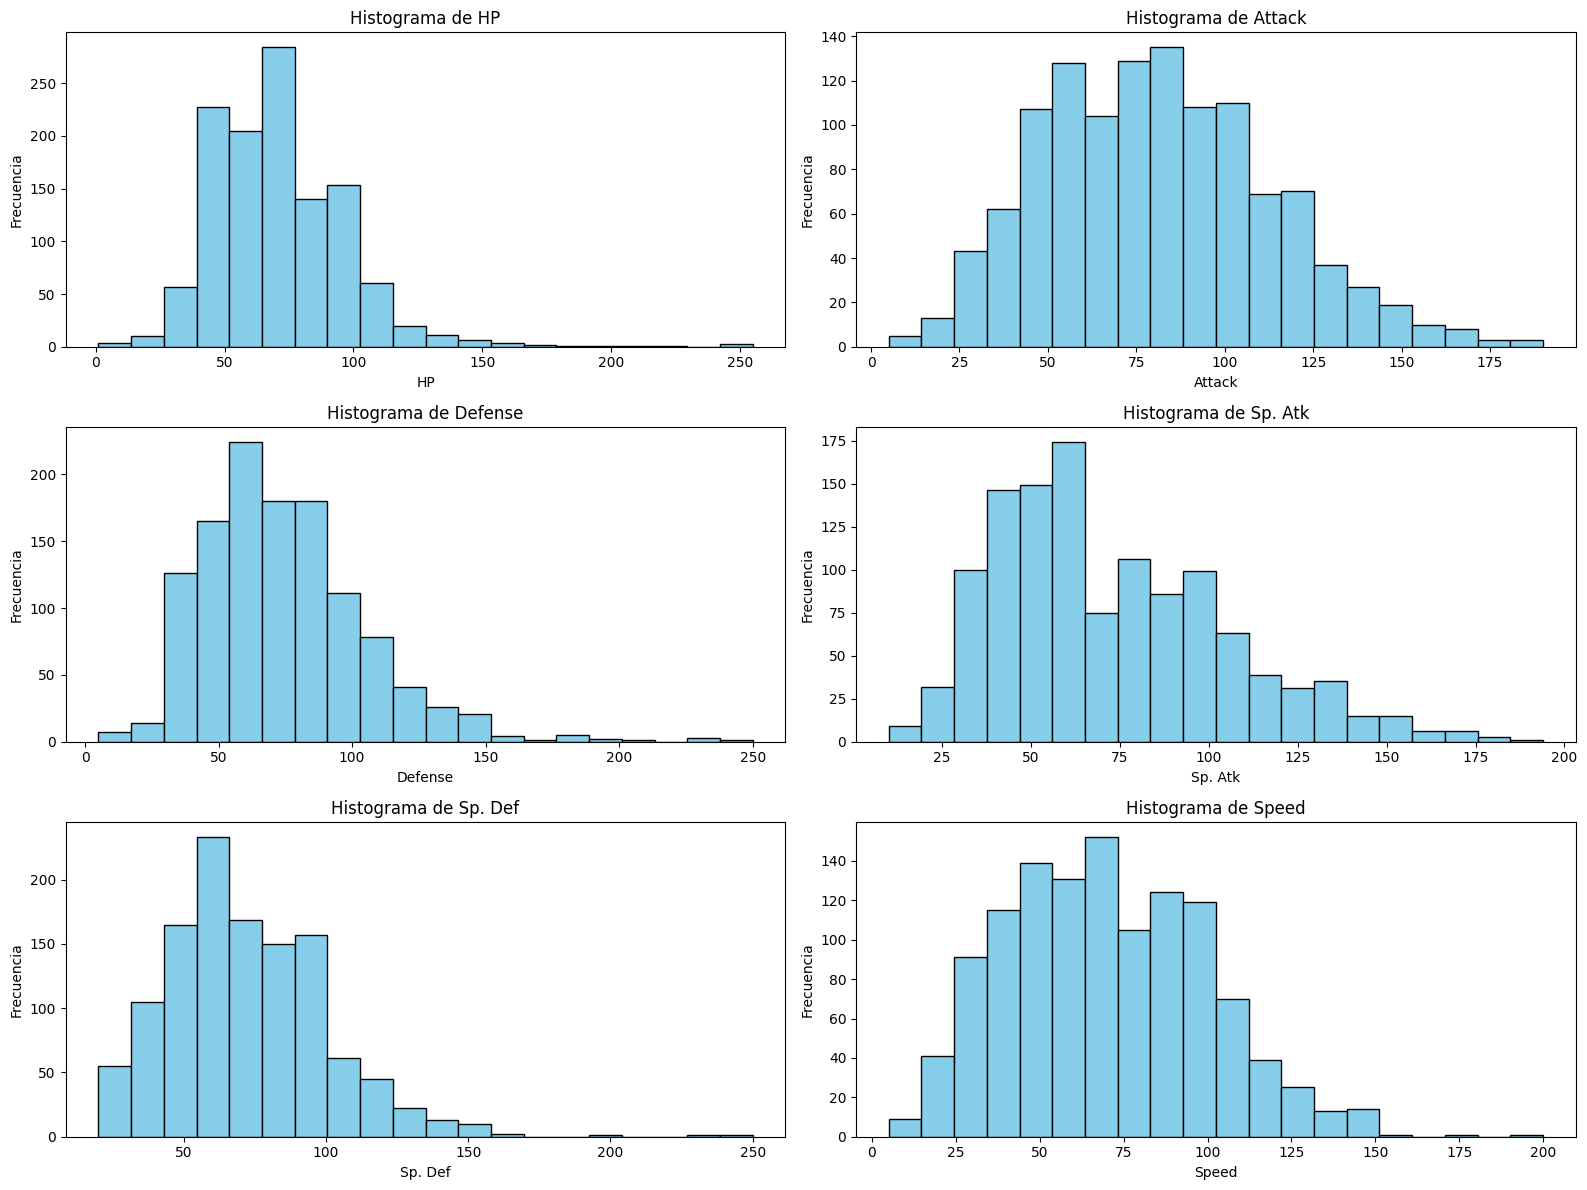

In [15]:
# Realizamos un histograma de las variables numéricas
variables_numericas = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed']
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

for i, variable in enumerate(variables_numericas):
    fila = i // 2
    columna = i % 2
    axs[fila, columna].hist(data[variable], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Frecuencia')
    axs[fila, columna].set_title('Histograma de ' + variable) 


plt.tight_layout()

plt.show()

Con estos gráficos podemos observar que los atributos de los Pokémon (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) tienden a concentrarse en el rango de 50 a 100.
Cada atributo tiene una moda clara en el rango de 50 a 75.
Hay muy pocos Pokémon con valores extremos en cualquier atributo (superiores a 150).


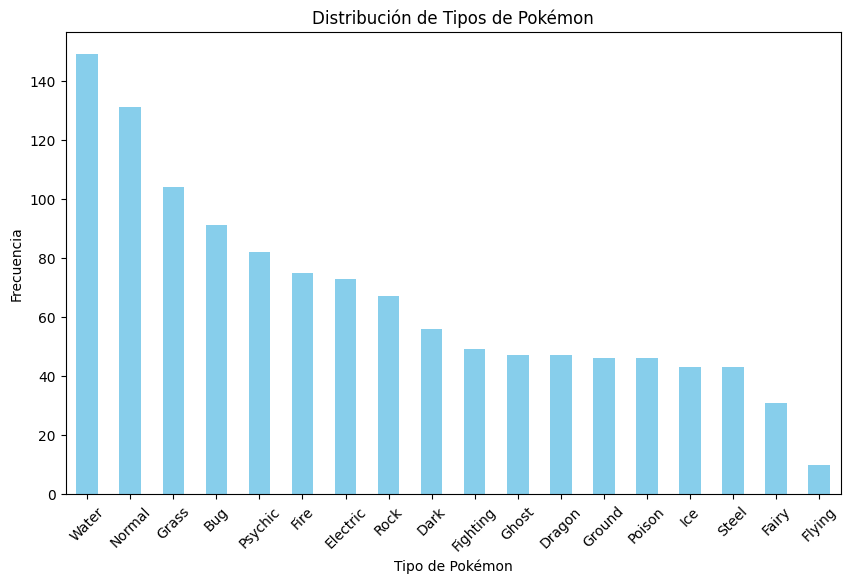

In [16]:

type_counts = data['Type'].value_counts()


plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Este gráfico de barras muestra la distribución de diferentes tipos de Pokémon en el conjunto de datos.

Además podemos observar que los tipos más comunes son Water, Normal, Grass, y Bug, mientras que los menos fecuentes son Fairy y Flying.

#### Codificación

Para predecir la columna type es necesario codificarla

In [17]:
# Vamos a codificar esta columna
types = data['Type'].unique()
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])
# Veamos el resultado
types_enc = data['Type'].unique()
print("Códigos para identificar a los tipos: ")
print('Type', '    Código')
for cu, co in zip(types, types_enc):
    print('{:<10} {:<5}'.format(cu, co))

Códigos para identificar a los tipos: 
Type     Código
Grass      9    
Fire       6    
Water      17   
Bug        0    
Normal     12   
Dark       1    
Poison     13   
Electric   3    
Ground     10   
Ice        11   
Fairy      4    
Steel      16   
Fighting   5    
Psychic    14   
Rock       15   
Ghost      8    
Dragon     2    
Flying     7    


### Eliminación de outliers

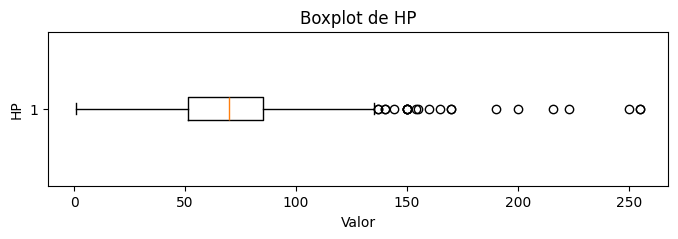

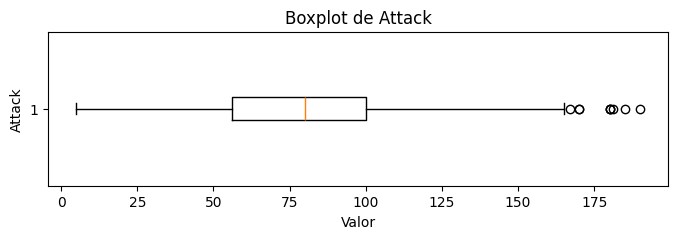

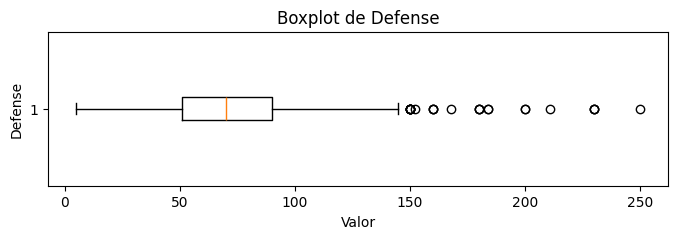

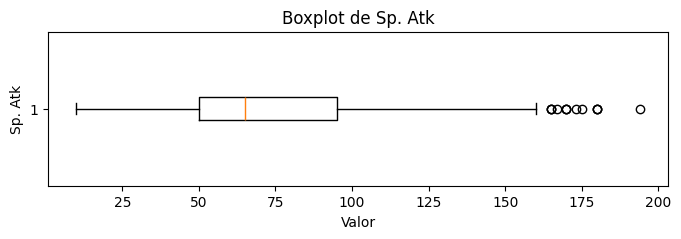

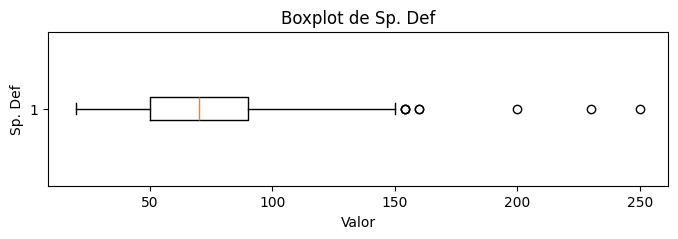

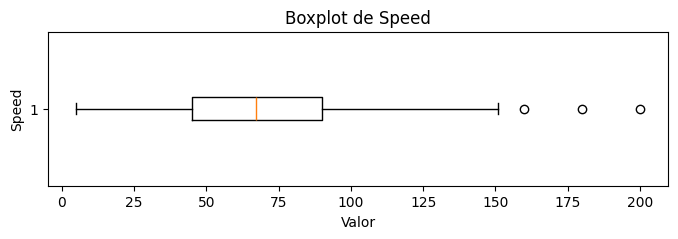

In [18]:
for variable in variables_numericas:
    plt.figure(figsize=(8, 2))
    plt.boxplot(data[variable], vert=False)
    plt.xlabel('Valor')
    plt.ylabel(variable)
    plt.title('Boxplot de ' + variable)
    plt.show()

Consideramos que los valores atípicos que vemos en los boxplot en realidad no lo son ya que son valores que puede asumir la característica en cada caso, por lo que decidimos dejarlos en el data set.

## Estandarización

Dado que los datos parecen tener distribuciones que se asemejan a la normal por lo que vimos en los histogramas, decidimos utilizar Z-score para normalizar.

In [23]:
scaler = StandardScaler()

data_scaled = data.copy()
data_scaled[variables_numericas] = scaler.fit_transform(data_scaled[variables_numericas])

print(data_scaled.head())

         Name  Type        HP    Attack   Defense   Sp. Atk   Sp. Def  \
0   Bulbasaur     9 -0.961965 -0.995385 -0.833294 -0.237596 -0.255210   
1     Ivysaur     9 -0.403828 -0.590478 -0.377347  0.221894  0.287758   
2    Venusaur     9  0.340354  0.032455  0.274006  0.834547  1.011716   
3    Venusaur     9  0.340354  0.593096  1.576713  1.508465  1.735674   
4  Charmander     6 -1.185219 -0.901945 -1.028700 -0.390759 -0.798179   

      Speed  
0 -0.817967  
1 -0.321141  
2  0.341293  
3  0.341293  
4 -0.155533  


## Estimación del atributo Type utilizando árboles de decisión (Clasificación)

Analizando los parámetros máximo profundidad, número mínimo de observaciones,
número mínimo de observaciones por separación y criterio de separación. Además graficamos el árbol obtenido en el proceso de entrenamiento y mostramos los resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

Consideramos que para predicir qué tipo de Pokemon es no es necesario incluir el nombre del mismo, por lo cual eliminamos esa columna.

In [24]:
data_scaled = data_scaled.drop(columns=['Name'])


Dividimos los datos en test y train

In [25]:
# Caso 1: 30% test - 70 % train
test = 0.3

#Caso 2
# test = 0.2

# Dividimos los datos
data_train, data_test  = train_test_split(data_scaled, test_size=test, random_state=42)

# Descomentar uno y comentar otro para ver los resultados con cada conjunto de test.


Generamos variables dummies

In [26]:
# Extraer las etiquetas (variable objetivo) de la columna 'class' en los DataFrames 'df_train' y 'df_test', y convertirlas en arreglos NumPy.
train_labels = np.array(data_train['Type'])
test_labels = np.array(data_test['Type'])

# Elimino las etiquetas para separar las características (variables independientes) de la variable objetivo.
data_train = data_train.drop(['Type'], axis = 1)
data_test = data_test.drop(['Type'], axis = 1)

# Lista de nombres de características extrayendo los nombres de columna del DataFrame 'df_train' para usarlos luego.
feature_list = list(data_train.columns)

# Convierte los DataFrames modificados (sin la columna 'class') es decir, las características (variables independientes) a array.
train_features = np.array(data_train)
test_features = np.array(data_test)

In [28]:
clf = tree.DecisionTreeClassifier()

In [31]:
#Entrenamos el modelo pasando las características de entrenamiento (train_features) y las etiquetas de entrenamiento correspondientes (train_labels).
decision_tree = clf.fit(train_features, train_labels)

# Predición en el conjunto de entrenamiento
clf_predictions_train = clf.predict(train_features)

# Predicción en el conjunto de prueba
clf_predictions_test = clf.predict(test_features)

In [32]:
feature_list

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [35]:
from sklearn.metrics import accuracy_score
#Evaluo el rendimiento del modelo
train_accuracy = accuracy_score(train_labels, clf_predictions_train)
test_accuracy = accuracy_score(test_labels, clf_predictions_test)
print("Entrenamiento: ")
print(train_accuracy)
print("Test: ")
print(test_accuracy)

Entrenamiento: 
0.9819927971188476
Test: 
0.17086834733893558


En principio, nuestro modelo no tiene una buena performance para extrapolar las predicciones en training a test. Una muy buena precisión en entrenamiento y una muy mala en test nos muestra un alto overfitting.

In [37]:
# Evaluamos el rendimiento del modelo con otras métricas
precision = precision_score(test_labels, clf_predictions_test, average='weighted')
recall = recall_score(test_labels, clf_predictions_test, average='weighted')
f1 = f1_score(test_labels, clf_predictions_test, average='weighted')

metrics = ['Precision', 'Recall', 'F1 Score']

# Esto lo hacemos para guardar las variables en cada caso
if test == 0.3:
    metrics_1 = [precision, recall, f1]
    
if test == 0.2:
    metrics_2 = [precision, recall, f1]

#print(f'metrics_1: {metrics_1}' if test == 0.3 else f'metrics_2: {metrics_2}')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

Precision: 0.16929291499442845
Recall: 0.17086834733893558
F1-Score: 0.1643922698116528


Nuestro modelo muestra muy mala performance en general.

In [38]:
# La idea es corrrer el codigo primero con una opcion de test - train y luego con la otra
# Pero puede suceder que lleguemos a este punto habiendo corrido una sola opción
# el try - except lo hacemos para que no de error en ese caso

try:    
    print('Métricas para el caso 1: 30% test - 70% train')
    print("Precisión: ", metrics_1[0].round(4))
    print("Exhaustividad: ", metrics_1[1].round(4))
    print("F1-Score: ", round(metrics_1[2], 4))
    print()
except NameError:
    print("metrics_1 no está definido, no te olvides de descomentar el código que esta más arriba para ver las métricas que se obtienen en este caso.")
    
try:
    print('Métricas para el caso 2: 20% test - 80% train')
    print("Precisión: ", metrics_2[0].round(4))
    print("Exhaustividad: ", metrics_2[1].round(4))
    print("F1-Score: ", round(metrics_2[2], 4))
except NameError:
    print("metrics_2 no está definido, no te olvides de descomentar el código que esta más arriba para ver las métricas que se obtienen en este caso.")

Métricas para el caso 1: 30% test - 70% train
Precisión:  0.1693
Exhaustividad:  0.1709
F1-Score:  0.1644

Métricas para el caso 2: 20% test - 80% train
metrics_2 no está definido, no te olvides de descomentar el código que esta más arriba para ver las métricas que se obtienen en este caso.


Con los valores obtenidos podemos concluir que el modelo de árbol de decisión muestra un mejor rendimiento en términos de precisión, exhaustividad y exactitud cuando se entrena con un 70% de los datos en comparación con el 80%. 

Por otro lado,  los valores de las métricas son bastante bajos en ambos casos. Esto indica que el modelo de árbol de decisión puede no ser el más adecuado para este problema de clasificación, por eso a continuación analizaremos otros métodos.

### Optimización de hiperparamétros

In [39]:
# max_depth: La profundidad máxima del árbol.
# max_features: El número máximo de características a considerar para cada división. Suele ser la raíz cuadrada del número de características.
# min_samples_split: El número mínimo de muestras necesarias para dividir un nodo interno.
# random_state: Semilla para la generación de números aleatorios.

param_grid = {
    'max_features': [3, 5, 6, 7, 9],
    'max_depth': [6, 9, 10, 11],
    'random_state': [18]
}
random_search = RandomizedSearchCV(tree.DecisionTreeClassifier(),
                                   param_grid)
random_search.fit(train_features, train_labels)
first_best_params = random_search.best_params_ # Mejores hiperparámetros encontrados durante la búsqueda aleatoria
best_prediction = random_search.predict(test_features) #Entrenamos el modelo con estos hiperparametros

precision = precision_score(test_labels, best_prediction, average='weighted')
recall = recall_score(test_labels, best_prediction, average='weighted', zero_division=0)
f1 = f1_score(test_labels, best_prediction, average='weighted', zero_division=0)

# Reporte de clasificación detallado
report = classification_report(test_labels, best_prediction)

print(f'Mejores Hiperparámetros: {first_best_params}')
print(f'Precisión: {round(precision, 4)}')
print(f'Exhaustividad (Recall): {round(recall, 4)}')
print(f'F1-Score: {round(f1,4)}')
print()
print(f'Reporte de Clasificación:\n{report}')

Mejores Hiperparámetros: {'random_state': 18, 'max_features': 6, 'max_depth': 6}
Precisión: 0.1341
Exhaustividad (Recall): 0.1597
F1-Score: 0.1358

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        27
           1       0.08      0.09      0.08        23
           2       0.14      0.10      0.12        10
           3       0.16      0.47      0.24        17
           4       0.00      0.00      0.00        11
           5       0.25      0.33      0.29        12
           6       0.07      0.06      0.06        18
           7       0.00      0.00      0.00         4
           8       0.06      0.07      0.06        14
           9       0.09      0.05      0.07        37
          10       0.11      0.14      0.12        14
          11       0.00      0.00      0.00        16
          12       0.23      0.43      0.30        37
          13       0.00      0.00      0.00        15
          14   

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Reporte de clasificación
- Precisión: Qué tan precisas son las predicciones para esa clase.
- Exhaustividad (Recall): Qué tan bien el modelo identifica correctamente los casos de esa clase.
- F1-Score: Combina precisión y recall en una sola métrica.
- Soporte: Número de instancias de la clase en el conjunto de datos.

In [40]:
precision = precision_score(test_labels, clf_predictions_test, average='macro')
recall = recall_score(test_labels, clf_predictions_test, average='macro')
f1 = f1_score(test_labels, clf_predictions_test, average='macro')
confusion = confusion_matrix(test_labels, clf_predictions_test)


print('Valores de las métricas con datos de test ')
print(f'F1-Score: {round(f1,4)} \nPrecision: {round(precision,4)} \nRecall: {round(recall,4)}')


Valores de las métricas con datos de test 
F1-Score: 0.148 
Precision: 0.1546 
Recall: 0.1555


In [41]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=feature_list)
print(r)

|--- Sp. Atk <= -0.34
|   |--- Defense <= 0.81
|   |   |--- Sp. Atk <= -1.33
|   |   |   |--- Attack <= -1.04
|   |   |   |   |--- HP <= -0.68
|   |   |   |   |   |--- Attack <= -1.87
|   |   |   |   |   |   |--- Speed <= -1.48
|   |   |   |   |   |   |   |--- class: 12
|   |   |   |   |   |   |--- Speed >  -1.48
|   |   |   |   |   |   |   |--- HP <= -1.80
|   |   |   |   |   |   |   |   |--- class: 17
|   |   |   |   |   |   |   |--- HP >  -1.80
|   |   |   |   |   |   |   |   |--- HP <= -1.33
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- HP >  -1.33
|   |   |   |   |   |   |   |   |   |--- HP <= -0.87
|   |   |   |   |   |   |   |   |   |   |--- class: 17
|   |   |   |   |   |   |   |   |   |--- HP >  -0.87
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Attack >  -1.87
|   |   |   |   |   |   |--- Defense <= -1.35
|   |   |   |   |   |   |   |--- Sp. Atk <= -1.48
|   |   |   |   |   |   |   |   |--- class: 0
| 


- En clasificacion el grafico. (es parte del punto 4) --> Lara
- Borrar esta seccion de cosas que faltan xd


## Estimación del atributo Type utilizando Bayes Ingenuo

In [59]:
data

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,9,45,49,49,65,65,45
1,Ivysaur,9,60,62,63,80,80,60
2,Venusaur,9,80,82,83,100,100,80
3,Venusaur,9,80,100,123,122,120,80
4,Charmander,6,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,1,55,80,80,135,120,100
1186,Roaring Moon,2,105,139,71,55,101,119
1187,Iron Valiant,4,74,130,90,120,60,116
1188,Koraidon,5,100,135,115,85,100,135


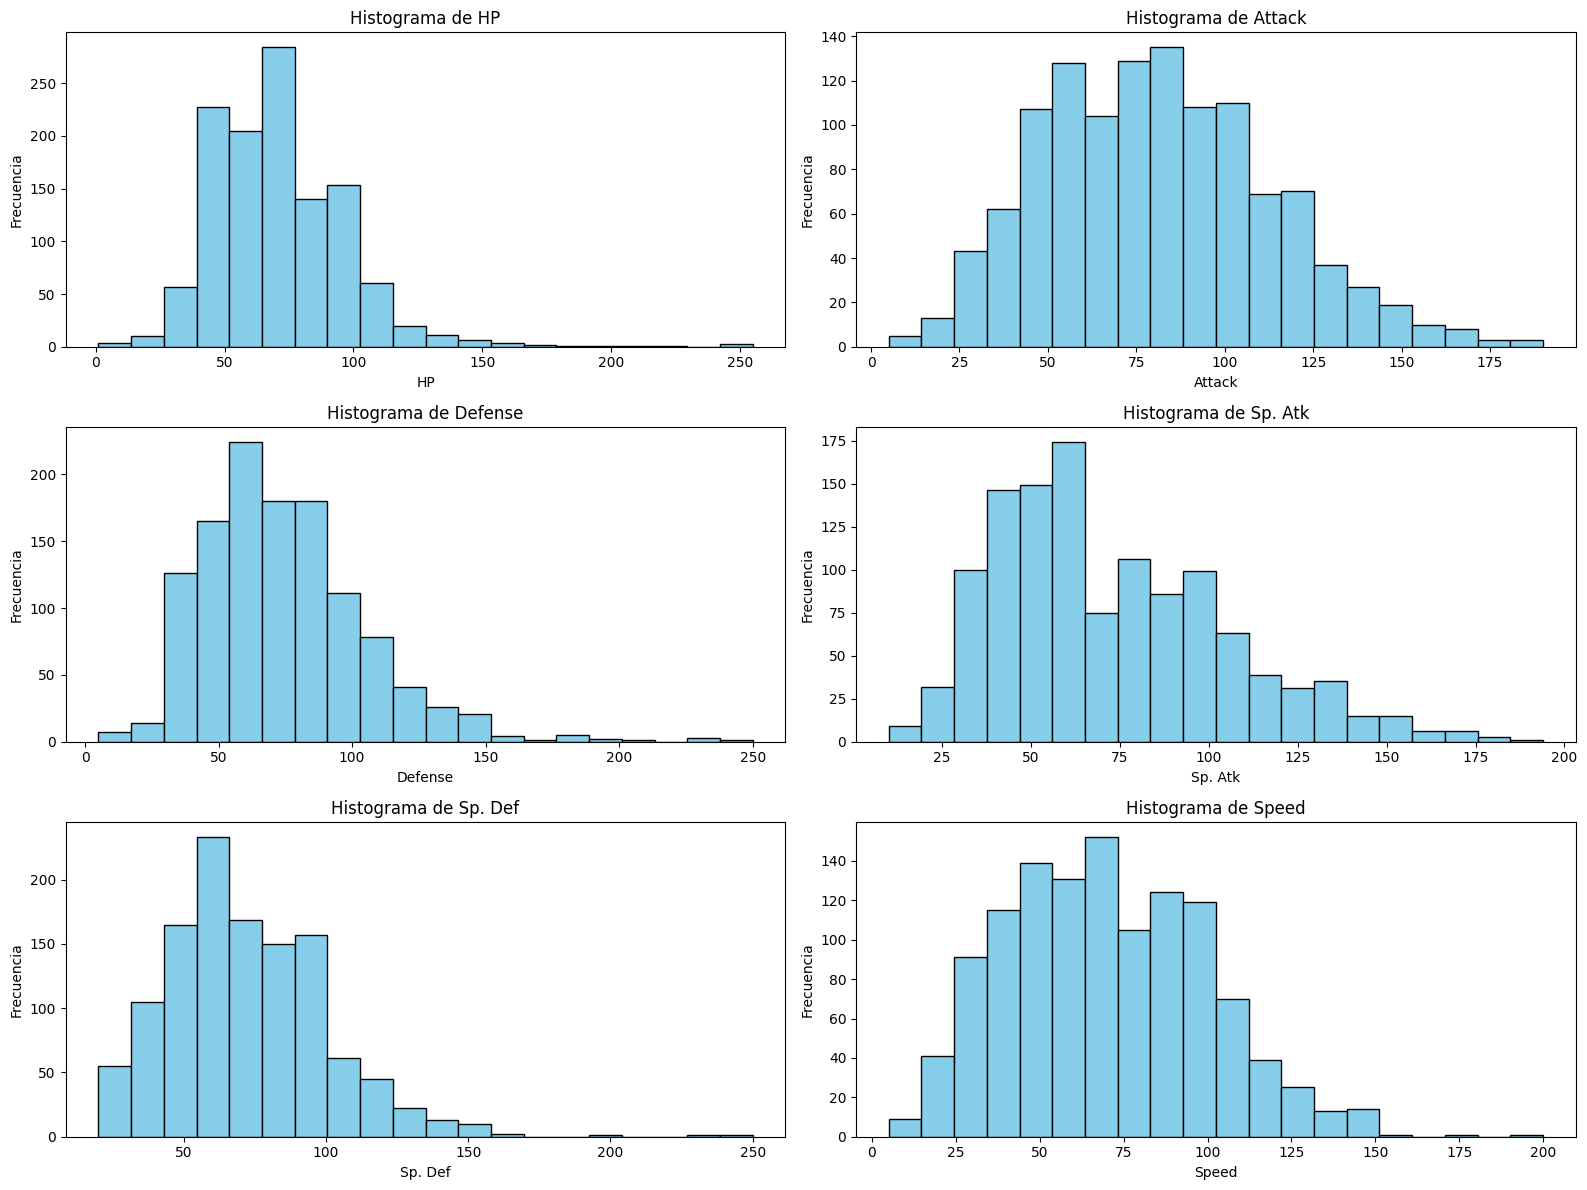

In [60]:
# Realizamos un histograma de las variables numéricas
variables_numericas = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed']
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

for i, variable in enumerate(variables_numericas):
    fila = i // 2
    columna = i % 2
    axs[fila, columna].hist(data[variable], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Frecuencia')
    axs[fila, columna].set_title('Histograma de ' + variable) 


plt.tight_layout()

plt.show()

Discretizemos las features usando los cuantiles de su distribución.

In [80]:
data_discret = data.copy()
for variable in variables_numericas:
    data_discret[variable] = pd.qcut(data_discret[variable], q=5, labels=False)
    print(f"Valores únicos para {variable}: {data_discret[variable].unique()}")

Valores únicos para HP: [0 1 3 2 4]
Valores únicos para Attack: [0 1 2 3 4]
Valores únicos para Defense: [0 1 3 4 2]
Valores únicos para Sp. Atk: [2 3 4 1 0]
Valores únicos para Sp. Def: [2 3 4 0 1]
Valores únicos para Speed: [1 3 2 4 0]


In [92]:
# Transformamos el dataset de la misma forma que antes, y generamos el set de training y test.
scaler = StandardScaler()
data_discret_scaled = data_discret.copy()
data_discret_scaled[variables_numericas] = scaler.fit_transform(data_discret_scaled[variables_numericas])

test = 0.3
data_discret_train, data_discret_test  = train_test_split(data_discret_scaled, test_size=test, random_state=42)

# Extraer las etiquetas (variable objetivo) de la columna 'class' en los DataFrames 'df_train' y 'df_test', y convertirlas en arreglos NumPy.
train_discret_labels = np.array(data_discret_train['Type'])
test_discret_labels = np.array(data_discret_test['Type'])

# Elimino las etiquetas para separar las características (variables independientes) de la variable objetivo.
data_discret_train = data_discret_train.drop(['Type', 'Name'], axis = 1)
data_discret_test = data_discret_test.drop(['Type', 'Name'], axis = 1)

# Convierte los DataFrames modificados (sin la columna 'class') es decir, las características (variables independientes) a array.
train_features_bayes = np.array(data_discret_train)
test_features_bayes = np.array(data_discret_test)

In [93]:
from sklearn.naive_bayes import GaussianNB

# Definición y Entrenamiento del Modelo
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(train_features_bayes, train_discret_labels)

GaussianNB()

In [94]:
bayes_predictions_train = model_GaussianNB.predict(train_features_bayes)
bayes_predictions_test = model_GaussianNB.predict(test_features_bayes)

In [96]:
# Calcular métricas
accuracy_bayes = accuracy_score(test_discret_labels, bayes_predictions_test)
precision_bayes = precision_score(test_discret_labels, bayes_predictions_test, average="weighted")
recall_bayes = recall_score(test_discret_labels, bayes_predictions_test, average="weighted")

# Crear una tabla con las métricas
metricas = pd.DataFrame({
    'Precision': [precision_bayes],
    'Accuracy': [accuracy_bayes],
    'Recall': [recall_bayes]
})

print(metricas)

   Precision  Accuracy    Recall
0   0.119551  0.148459  0.148459


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
# Veamos qué pasa si le damos diferentes porcentajes de data de entrenamiento
for test in [0.2, 0.1, 0.35]:
    print(f"Entrenamiento con {int(test*100)}% de datos de test:")
    data_discret_train, data_discret_test  = train_test_split(data_discret_scaled, test_size=test, random_state=42)

    # Extraer las etiquetas (variable objetivo) de la columna 'class' en los DataFrames 'df_train' y 'df_test', y convertirlas en arreglos NumPy.
    train_discret_labels = np.array(data_discret_train['Type'])
    test_discret_labels = np.array(data_discret_test['Type'])

    # Elimino las etiquetas para separar las características (variables independientes) de la variable objetivo.
    data_discret_train = data_discret_train.drop(['Type', 'Name'], axis = 1)
    data_discret_test = data_discret_test.drop(['Type', 'Name'], axis = 1)

    # Convierte los DataFrames modificados (sin la columna 'class') es decir, las características (variables independientes) a array.
    train_features_bayes = np.array(data_discret_train)
    test_features_bayes = np.array(data_discret_test)

    # Definición y Entrenamiento del Modelo
    model_GaussianNB = GaussianNB()
    model_GaussianNB.fit(train_features_bayes, train_discret_labels)

    bayes_predictions_train = model_GaussianNB.predict(train_features_bayes)
    bayes_predictions_test = model_GaussianNB.predict(test_features_bayes)

    # Calcular métricas
    accuracy_bayes = accuracy_score(test_discret_labels, bayes_predictions_test)
    precision_bayes = precision_score(test_discret_labels, bayes_predictions_test, average="weighted")
    recall_bayes = recall_score(test_discret_labels, bayes_predictions_test, average="weighted")

    # Crear una tabla con las métricas
    metricas = pd.DataFrame({
        'Precision': [precision_bayes],
        'Accuracy': [accuracy_bayes],
        'Recall': [recall_bayes]
    })

    print(metricas)

Entrenamiento con 20% de datos de test:
   Precision  Accuracy    Recall
0   0.130679  0.155462  0.155462
Entrenamiento con 10% de datos de test:
   Precision  Accuracy    Recall
0   0.103863  0.159664  0.159664
Entrenamiento con 35% de datos de test:
   Precision  Accuracy    Recall
0   0.134323  0.151079  0.151079


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Vemos que no hay una mejora sustancial, y que nuestro modelo una vez más, es bastante malo para predecir el tipo de Pókemon con las features provistas.

##  Estimación del atributo Type utilizando k-NN 

Entrenemos un modelo de k-NN (vecinos más cercanos), para ver si podemos obtener mejores predicciones, considerando que este no hace suposiciones sobre los datos y se enterna cada vez que clasifica (lazy learning).


Realizar la estimación del atributo Type utilizando k-NN analizando los parámetros 
cantidad de vecinos, métrica y valor de p. Mostrar los resultados sobre un conjunto de 
test (Precisión, Exhaustividad y Exactitud). 

In [101]:
from sklearn.neighbors import KNeighborsClassifier

Entrenemos el modelo buscando los mejores hiperparámetros.

In [107]:
# n_neighbors: la cantidad de vecinos.
# metric: las diferentes métricas para medir la cercanía
# p: tipos de métricas

param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 15],
    'p': [1,2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Crear la búsqueda aleatoria con el modelo k-NN
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(train_features_bayes, train_discret_labels)

# Hacer predicciones con el modelo ajustado
best_prediction = random_search.predict(test_features_bayes)

# Calcular las métricas de rendimiento
precision = precision_score(test_discret_labels, best_prediction, average='weighted')
recall = recall_score(test_discret_labels, best_prediction, average='weighted', zero_division=0)
f1 = f1_score(test_discret_labels, best_prediction, average='weighted', zero_division=0)

# Reporte de clasificación detallado
report = classification_report(test_discret_labels, best_prediction)

# Imprimir los resultados
print(f'Mejores Hiperparámetros: {random_search.best_params_}')
print(f'Precisión: {round(precision, 4)}')
print(f'Exhaustividad (Recall): {round(recall, 4)}')
print(f'F1-Score: {round(f1, 4)}')
print()
print(f'Reporte de Clasificación:\n{report}')


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores Hiperparámetros: {'p': 1, 'n_neighbors': 9, 'metric': 'euclidean'}
Precisión: 0.0943
Exhaustividad (Recall): 0.1103
F1-Score: 0.0951

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.19      0.34      0.24        32
           1       0.00      0.00      0.00        24
           2       0.14      0.29      0.19        14
           3       0.09      0.17      0.12        23
           4       0.00      0.00      0.00        12
           5       0.05      0.07      0.06        14
           6       0.08      0.09      0.09        23
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        16
           9       0.13      0.10      0.11        42
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        18
          12       0.11      0.15      0.13        46
          13       0.00      0.00      0.00        17
          14       0.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Nuestro modelo de K-NN con 9 vecinos y métrica euclídea fue el que mejor performance tuvo, aunque sigue teniendo malas predicciones en general.

## Conclusiones

*Repasando...*
Precisiones de las predicciones:

**Árboles de Decisión:** 0.1341

**Bayes Ingenuo**: 0.134323

**K-NN**: 0.0943

De nuestros modelos de predicción, Árboles de Decisión y Bayes Ingenuo tienen una precisión similar, aunque muy baja. Solo el 13% de las predicciones son correctas. Considerando que la precisión durante el entrenamiento era bastante aceptable, consideramos que nuestros modelos están overfitteando; pero como hemos visto, no hemos podido evitarlo ajustando hiperparámetros. Por ello concluímos que, o el dataset no es lo suficientemente explicativo, o los modelos aquí desarrollados son limitados para realizar las predicciones correctamente.